In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/arc-prize-2024/arc-agi_training_solutions.json
/kaggle/input/arc-prize-2024/arc-agi_evaluation_solutions.json
/kaggle/input/arc-prize-2024/arc-agi_evaluation_challenges.json
/kaggle/input/arc-prize-2024/sample_submission.json
/kaggle/input/arc-prize-2024/arc-agi_training_challenges.json
/kaggle/input/arc-prize-2024/arc-agi_test_challenges.json


# <p style="font-family: 'Amiri'; font-size: 2rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #deadb2; padding: 30px; border-radius: 20px; border: 8px solid black; width:90%"> |ARC Prize 2024|</p>

# <p style="font-family: 'Amiri'; font-size: 2rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #deadb2; padding: 10px; border-radius: 20px; border: 8px solid black; width:90%">Import Dependencies</p>

In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from   matplotlib import colors

In [3]:
base_path='/kaggle/input/arc-prize-2024/'
# Loading JSON data
def load_json(file_path):
    with open(file_path) as f:
        data = json.load(f)
    return data

In [4]:
df = pd.read_csv("/kaggle/input/arc-prize-2024/arc-agi_training_solutions.json")   
training_challenges   = load_json(base_path +'arc-agi_training_challenges.json')

# <p style="font-family: 'Amiri'; font-size: 2rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #deadb2; padding: 10px; border-radius: 20px; border: 8px solid black; width:90%">Extracting Input, output and subtraction</p>

In [5]:
#matrix reader 
def get_matrix_pair(challenge):
    x = pd.DataFrame(challenge['input'])
    y = pd.DataFrame(challenge['output'])
    
    #only is a subtraction but you can change it for another operation
    z = y - x
    return x, y, z

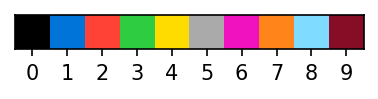

In [6]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)

plt.figure(figsize=(3, 1), dpi=150)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

# <p style="font-family: 'Amiri'; font-size: 2rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #deadb2; padding: 10px; border-radius: 20px; border: 8px solid black; width:90%">Heatmap With Numbers</p>

In [7]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current Axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


In [8]:
#adding text of numbers to heatmap
def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [9]:
def ploting_exercices(challenge, x,y,z):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(challenge)
    cmap = colors.ListedColormap(['#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
                                      '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
    norm = colors.Normalize(vmin=0, vmax=9)
    ax1.imshow(x, cmap=cmap, norm=norm)
    ax1.set_title('Input')
    ax2.imshow(y, cmap=cmap, norm=norm)
    ax2.set_title('Output')
    ax3.imshow(z, cmap=cmap, norm=norm)
    ax3.set_title('(output) - (input)')
    
    # Loop over data dimensions and create text annotations.
    for i in range(len(x[0])):
        for j in range(len(x[0])):
            text = ax1.text(i, j, x[i][j],
                           ha="center", va="center", color="r", size= 15)
    
    for i in range(len(x[0])):
        for j in range(len(x[0])):
            text = ax2.text(i, j, y[i][j],
                           ha="center", va="center", color="r", size=15)
    
    for i in range(len(x[0])):
        for j in range(len(x[0])):
            text = ax3.text(i, j, z[i][j],
                           ha="center", va="center", color="r", size=15)
    
    
    fig.tight_layout()
    plt.show()

# <p style="font-family: 'Amiri'; font-size: 2rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #deadb2; padding: 10px; border-radius: 20px; border: 8px solid black; width:90%">Plotting 10 examples</p>

##### left to right

##### plot 1 = input
##### plot 2 = output
##### plot 3 = output - input

In [10]:
print(df.columns)

Index(['{"007bbfb7": [[[7', ' 0', ' 7', ' 0.1', ' 0.2', ' 0.3', ' 7.1', ' 0.4',
       ' 7]', ' [7',
       ...
       ' [8.215', ' 8.2794', ' 8.2795', ' 8.2796', ' 8].235', ' [8.216',
       ' 0.25630', ' 8.2797', ' 8.2798', ' 0]]]}'],
      dtype='object', length=56672)


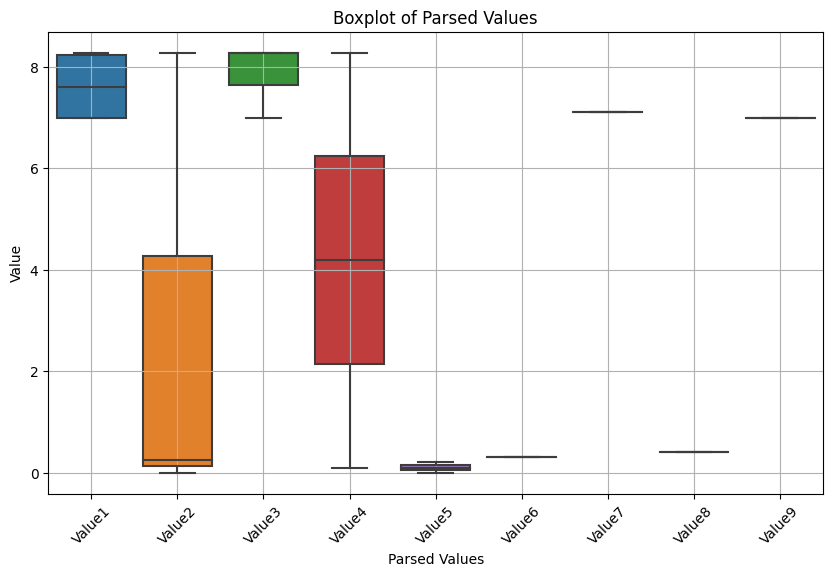

In [11]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for demonstration
data = {
    'parsed_data': ['{"007bbfb7": [[[7, 0, 7, 0.1, 0.2, 0.3, 7.1, 0.4, 7], [7], [8.2794, 8.2795, 8.2796], [8.216, 0.25630, 8.2797, 8.2798, 0]]]}']
}

# Create DataFrame
df = pd.DataFrame(data)

# Function to parse the JSON-like structure
def parse_data(row):
    try:
        # Clean and parse the JSON string
        cleaned_str = row['parsed_data'].replace("'", '"')  # Replace single quotes with double quotes
        parsed_json = json.loads(cleaned_str)
        return parsed_json
    except json.JSONDecodeError as e:
        print(f"JSON decoding error: {e}")
        return None

# Apply the parsing function
df['parsed'] = df.apply(parse_data, axis=1)

# Expand the parsed data into a usable format
expanded_data = []
for entry in df['parsed']:
    if entry:
        for key, value in entry.items():
            for sublist in value[0]:  # Assuming the first element is the list of interest
                expanded_data.append(sublist)

# Convert expanded data to DataFrame
expanded_df = pd.DataFrame(expanded_data, columns=['Value1', 'Value2', 'Value3', 'Value4', 'Value5', 'Value6', 'Value7', 'Value8', 'Value9'])

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=expanded_df)
plt.title('Boxplot of Parsed Values')
plt.xlabel('Parsed Values')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# <p style="font-family: 'Amiri'; font-size: 2rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #deadb2; padding: 10px; border-radius: 20px; border: 8px solid black; width:90%">Data Loading</p>

In [12]:
import json

def load_json_data(file_path):
    """
    Load JSON data from a file.
    
    Parameters:
    file_path (str): The path to the JSON file.
    
    Returns:
    dict: The JSON data loaded as a dictionary, or None if an error occurs.
    """
    try:
        # Attempt to open and read the JSON file at the specified path
        with open(file_path, 'r') as file:
            data = json.load(file)  # Parse the JSON content into a Python dictionary
        print(f"Successfully loaded data from {file_path}")  # Print success message
        return data  # Return the loaded data.
    except FileNotFoundError:
        # Handle the error if the specified file is not found
        print(f"Error: The file '{file_path}' was not found.")
        return None  # Return None to indicate failure
    except json.JSONDecodeError:
        # Handle the error if the file content cannot be decoded as valid JSON.
        print(f"Error: Failed to decode JSON from '{file_path}'. Please check the file format.")
        return None  # Return None to indicate failure

# Example usage:
# Load data from specific JSON files related to an ARC challenge

agi_evaluation_challenges = load_json_data('/kaggle/input/arc-prize-2024/arc-agi_evaluation_challenges.json')
# Loads the JSON file containing challenges for the AGI evaluation set

agi_evaluation_solutions = load_json_data('/kaggle/input/arc-prize-2024/arc-agi_evaluation_solutions.json')
# Loads the JSON file containing solutions for the AGI evaluation set

agi_test_challenges = load_json_data('/kaggle/input/arc-prize-2024/arc-agi_test_challenges.json')
# Loads the JSON file containing challenges for the AGI test set

agi_training_challenges = load_json_data('/kaggle/input/arc-prize-2024/arc-agi_training_challenges.json')
# Loads the JSON file containing challenges for the AGI training set

agi_training_solutions = load_json_data('/kaggle/input/arc-prize-2024/arc-agi_training_solutions.json')
# Loads the JSON file containing solutions for the AGI training set

Successfully loaded data from /kaggle/input/arc-prize-2024/arc-agi_evaluation_challenges.json
Successfully loaded data from /kaggle/input/arc-prize-2024/arc-agi_evaluation_solutions.json
Successfully loaded data from /kaggle/input/arc-prize-2024/arc-agi_test_challenges.json
Successfully loaded data from /kaggle/input/arc-prize-2024/arc-agi_training_challenges.json
Successfully loaded data from /kaggle/input/arc-prize-2024/arc-agi_training_solutions.json


# <p style="font-family: 'Amiri'; font-size: 2rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #deadb2; padding: 10px; border-radius: 20px; border: 8px solid black; width:90%"> Data summarization</p>

In [13]:
import json

def load_json_data(file_path):
    """
    Load JSON data from a file.
    Parameters:
    file_path (str): The path to the JSON file.
    Returns:
    dict: The JSON data loaded as a dictionary, or None if an error occurs.
    """
    try:
        with open(file_path, 'r') as file:
            data = json.load(file) 
        print(f"Successfully loaded data from {file_path}")  
        return data 
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
        return None 
    except json.JSONDecodeError:
        print(f"Error: Failed to decode JSON from '{file_path}'. Please check the file format.")
        return None  
agi_evaluation_challenges = load_json_data('/kaggle/input/arc-prize-2024/arc-agi_evaluation_challenges.json')
agi_evaluation_solutions = load_json_data('/kaggle/input/arc-prize-2024/arc-agi_evaluation_solutions.json')
agi_test_challenges = load_json_data('/kaggle/input/arc-prize-2024/arc-agi_test_challenges.json')
agi_training_challenges = load_json_data('/kaggle/input/arc-prize-2024/arc-agi_training_challenges.json')
agi_training_solutions = load_json_data('/kaggle/input/arc-prize-2024/arc-agi_training_solutions.json')

Successfully loaded data from /kaggle/input/arc-prize-2024/arc-agi_evaluation_challenges.json
Successfully loaded data from /kaggle/input/arc-prize-2024/arc-agi_evaluation_solutions.json
Successfully loaded data from /kaggle/input/arc-prize-2024/arc-agi_test_challenges.json
Successfully loaded data from /kaggle/input/arc-prize-2024/arc-agi_training_challenges.json
Successfully loaded data from /kaggle/input/arc-prize-2024/arc-agi_training_solutions.json


In [14]:
print(f'Number of evaluation challenges = {len(agi_evaluation_challenges)}')
print(f'Number of evaluation solutions = {len(agi_evaluation_solutions)}')
print(f'Number of test challenges = {len(agi_test_challenges)}')
print(f'Number of training challenges = {len(agi_training_challenges)}')
print(f'Number of training solutions = {len(agi_training_solutions)}')

Number of evaluation challenges = 400
Number of evaluation solutions = 400
Number of test challenges = 100
Number of training challenges = 400
Number of training solutions = 400


#### Extracting the key for each challenge and prints out its index and identifier.

I think this could be useful for getting a quick overview of the challenges available and ensuring that the data is structured correctly before further analysis or visualization.

In [15]:
for i in range(20):
    t=list(agi_training_challenges)[i]
    task=agi_training_challenges[t]
    print(f'Set #{i}, {t}')

Set #0, 007bbfb7
Set #1, 00d62c1b
Set #2, 017c7c7b
Set #3, 025d127b
Set #4, 045e512c
Set #5, 0520fde7
Set #6, 05269061
Set #7, 05f2a901
Set #8, 06df4c85
Set #9, 08ed6ac7
Set #10, 09629e4f
Set #11, 0962bcdd
Set #12, 0a938d79
Set #13, 0b148d64
Set #14, 0ca9ddb6
Set #15, 0d3d703e
Set #16, 0dfd9992
Set #17, 0e206a2e
Set #18, 10fcaaa3
Set #19, 11852cab


In [16]:
task = agi_training_challenges['007bbfb7'] #Shown training challanges data
print(task.keys())

dict_keys(['test', 'train'])


In [17]:
n_train_pairs = len(task['train'])
n_test_pairs = len(task['test'])

print(f'task contains {n_train_pairs} training pairs')
print(f'task contains {n_test_pairs} test pairs')

task contains 5 training pairs
task contains 1 test pairs


In [18]:
display(task['train'][0]['input'])
display(task['train'][0]['output'])

[[0, 7, 7], [7, 7, 7], [0, 7, 7]]

[[0, 0, 0, 0, 7, 7, 0, 7, 7],
 [0, 0, 0, 7, 7, 7, 7, 7, 7],
 [0, 0, 0, 0, 7, 7, 0, 7, 7],
 [0, 7, 7, 0, 7, 7, 0, 7, 7],
 [7, 7, 7, 7, 7, 7, 7, 7, 7],
 [0, 7, 7, 0, 7, 7, 0, 7, 7],
 [0, 0, 0, 0, 7, 7, 0, 7, 7],
 [0, 0, 0, 7, 7, 7, 7, 7, 7],
 [0, 0, 0, 0, 7, 7, 0, 7, 7]]

# <p style="font-family: 'Amiri'; font-size: 2rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #deadb2; padding: 10px; border-radius: 20px; border: 8px solid black; width:90%">Data Processing</p>

### Color Mapping and Normalization
The visualization process begins with defining a custom colormap consisting of ten distinct colors. Each color is associated with specific values in the data matrices, ensuring that the visual representation remains consistent and easily interpretable. To facilitate this, the values in the matrices are normalized to a range of 0 to 9, allowing for accurate mapping to the colors in the colormap.

### Plotting Function for Tasks
A specialized function is designed to visualize both training and testing examples for a given task. This function takes several parameters, including a dictionary that contains the training and testing data, the expected solutions for test inputs, and identifiers for the task.

The function sets up a grid layout for the plots, featuring two rows: one dedicated to input data and the other to output data. Each column corresponds to a specific training or test pair. The input and output matrices for each training example are displayed, along with the first test input and its associated expected output. This setup utilizes a matrix visualization technique to enhance understanding.

### Individual Matrix Plotting
To manage the visualization of individual matrices, another function extracts specific data based on whether the focus is on training or testing, as well as whether the data is an input or an output. Each matrix is plotted on designated axes, with titles that clarify the type of data being presented (e.g., 'Training Input').

### Enhancements for Clarity
To improve the readability of the plots, grid lines are added, which help delineate individual cells within the matrices. Ticks are positioned appropriately to align with the matrix dimensions, and unnecessary tick labels are removed for a cleaner look. A light grey background is applied to enhance contrast, making the data easier to analyze visually.

### Summary of Data Visualization
The overall process employs a series of custom functions to effectively visualize training and testing examples associated with specific tasks. A grid of subplots is created, clearly displaying each training input-output pair and the initial test input-output pair. The visualizations utilize a consistent color scheme derived from the defined colormap and normalization process, making it easier to interpret how input data transforms into output. This approach facilitates the identification of patterns within the data, aiding in deeper analysis and understanding.

In [19]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Define a simpler color map and normalization
cmap = colors.ListedColormap(['#000000', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
norm = colors.Normalize(vmin=0, vmax=4)

def plot_task(task, task_solutions, task_index, task_name):
    """
    Plots the first train and test pairs of a specified task,
    with a simplified color scheme.
    """
    num_train = len(task['train'])
    total_plots = num_train + 1  # Including one for test input/output

    fig, axs = plt.subplots(2, total_plots, figsize=(3 * total_plots, 6))
    plt.suptitle(f'Set #{task_index}, {task_name}', fontsize=16, fontweight='bold', y=1.02)

    for train_idx in range(num_train):
        plot_one(axs[0, train_idx], task['train'][train_idx]['input'], title='Train Input')
        plot_one(axs[1, train_idx], task['train'][train_idx]['output'], title='Train Output')

    # Plot the test input and solution output
    plot_one(axs[0, num_train], task['test'][0]['input'], title='Test Input')
    plot_one(axs[1, num_train], task_solutions, title='Test Output')

    fig.tight_layout()
    plt.show()
    print(f'Set #{task_index}, {task_name}')

def plot_one(ax, matrix, title=""):
    """
    Helper function to plot a matrix with grid and basic formatting.
    """
    ax.imshow(matrix, cmap=cmap, norm=norm)
    ax.set_title(title, fontsize=12)
    add_grid_and_format(ax, matrix)

def add_grid_and_format(ax, matrix):
    """
    Adds grid lines and formatting to enhance readability.
    """
    ax.grid(True, color='lightgrey', linewidth=0.5)
    ax.set_xticks([x - 0.5 for x in range(len(matrix[0]) + 1)])
    ax.set_yticks([y - 0.5 for y in range(len(matrix) + 1)])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(left=False, bottom=False)
    ax.set_facecolor('#eeeeee')

# <p style="font-family: 'Amiri'; font-size: 2rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #deadb2; padding: 10px; border-radius: 20px; border: 8px solid black; width:90%">Visuallization</p>


1. This visualization provides insights into how the model is expected to transform input data based on its training. The following steps outline the process:
1. Loop Through Tasks: The visualization iterates through the first 30 tasks, creating a comprehensive view of various transformations.
1. Retrieve Data: For each task, the function retrieves the task key, accesses the associated input-output data, and extracts the first solution from the test set.
1. Plot the Task: The function then calls plot_task to display each task's input and output matrices along with the model's expected solution. This visual comparison helps in analyzing the model's learning and generalization capabilities.

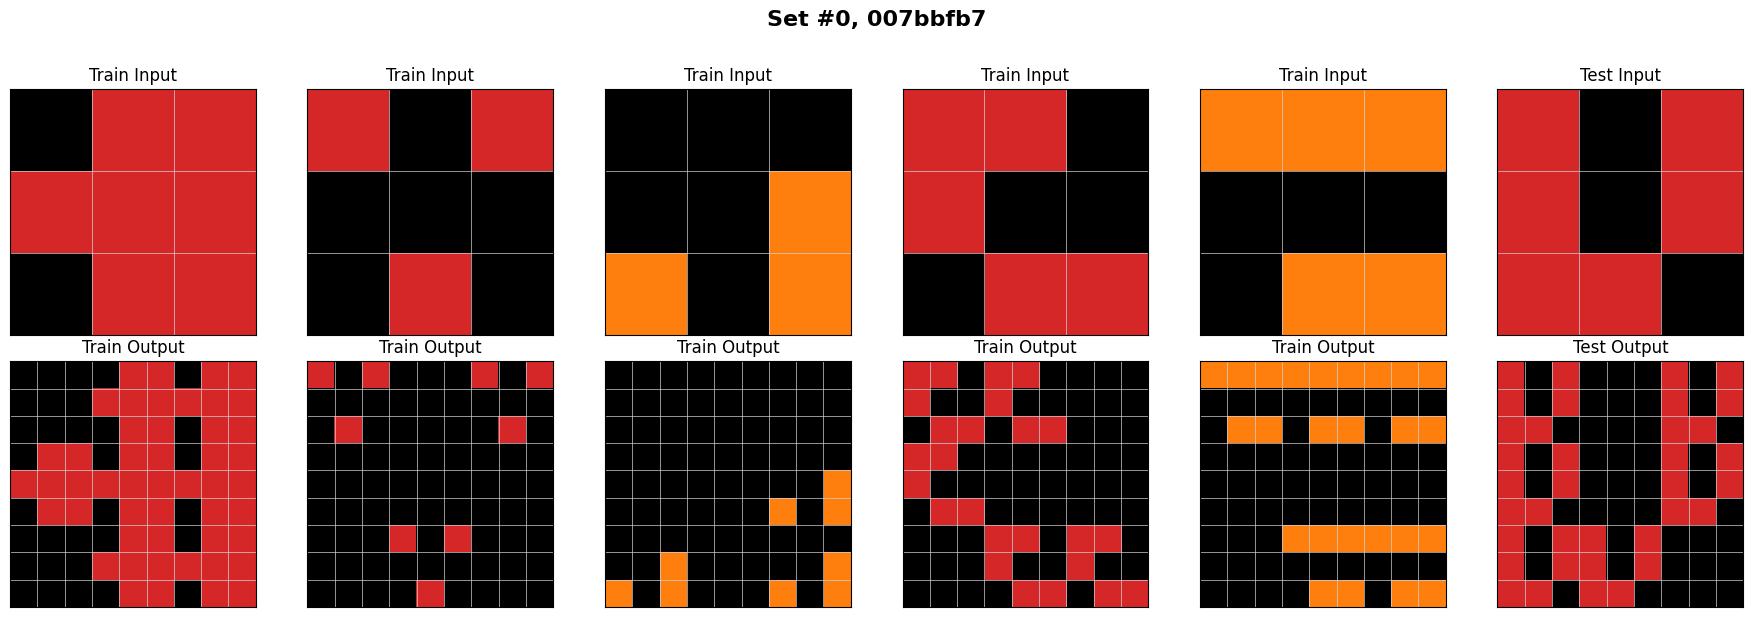

Set #0, 007bbfb7


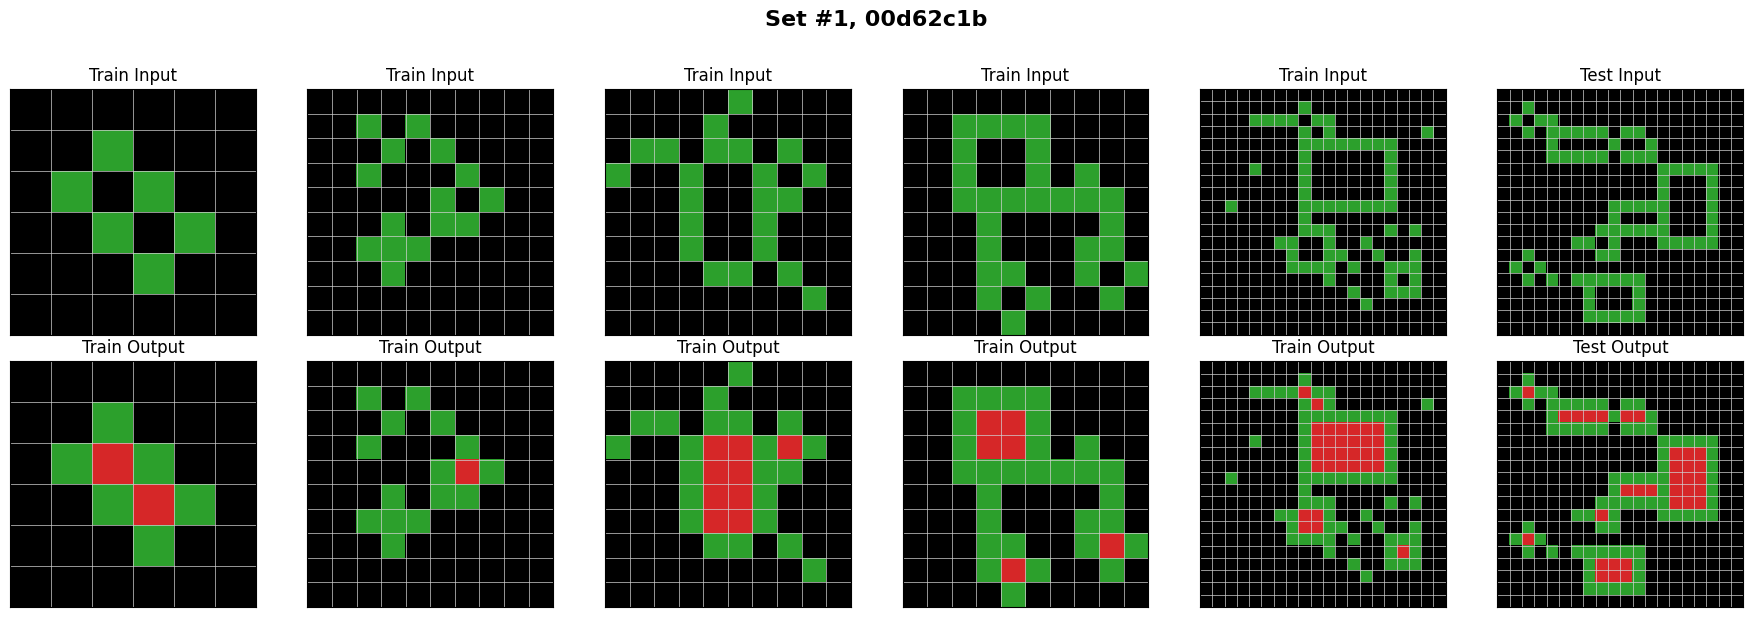

Set #1, 00d62c1b


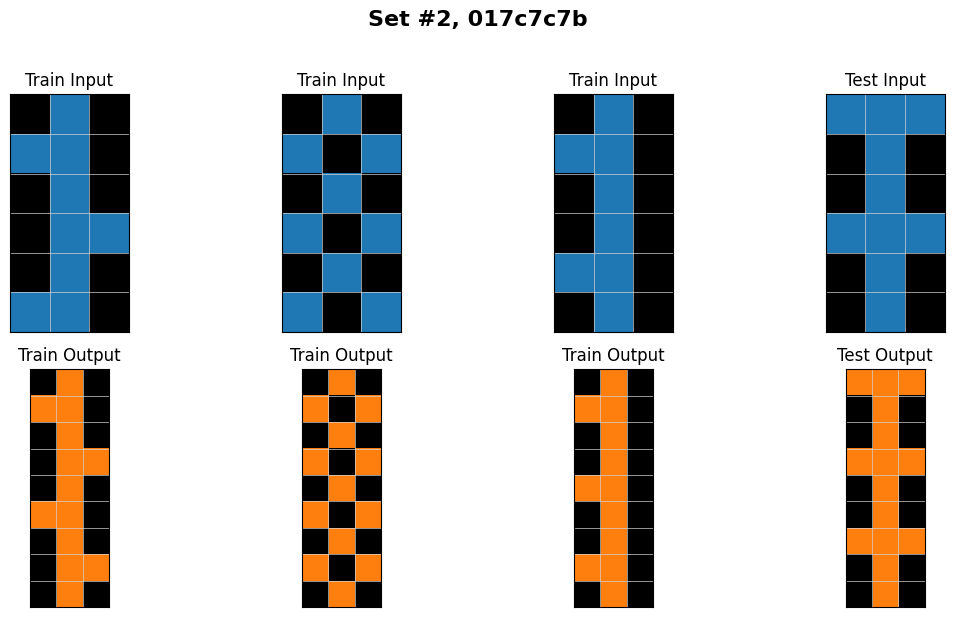

Set #2, 017c7c7b


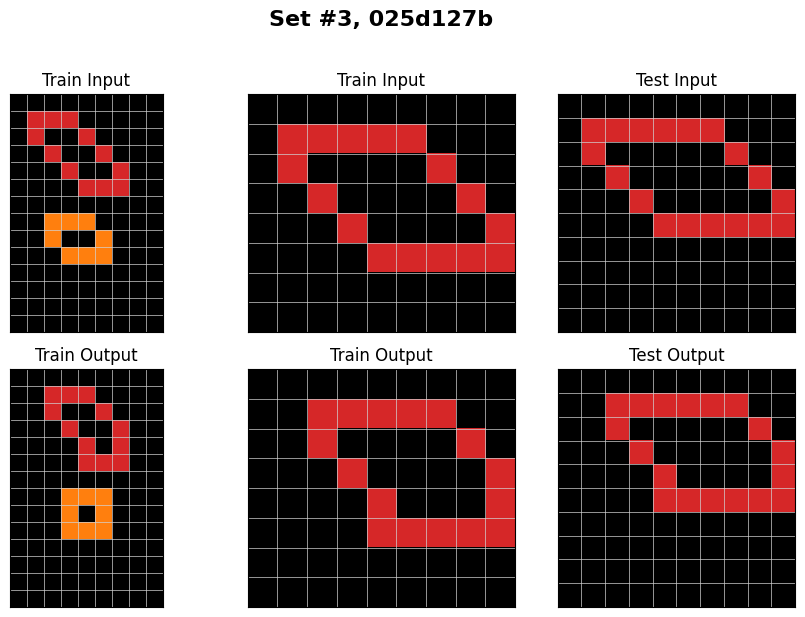

Set #3, 025d127b


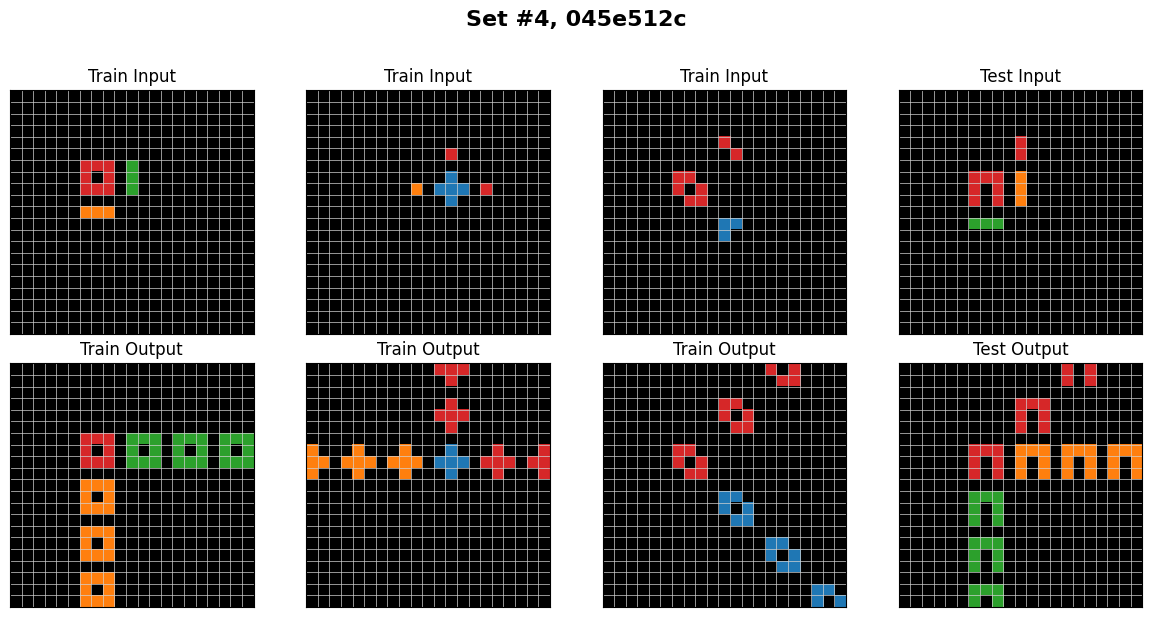

Set #4, 045e512c


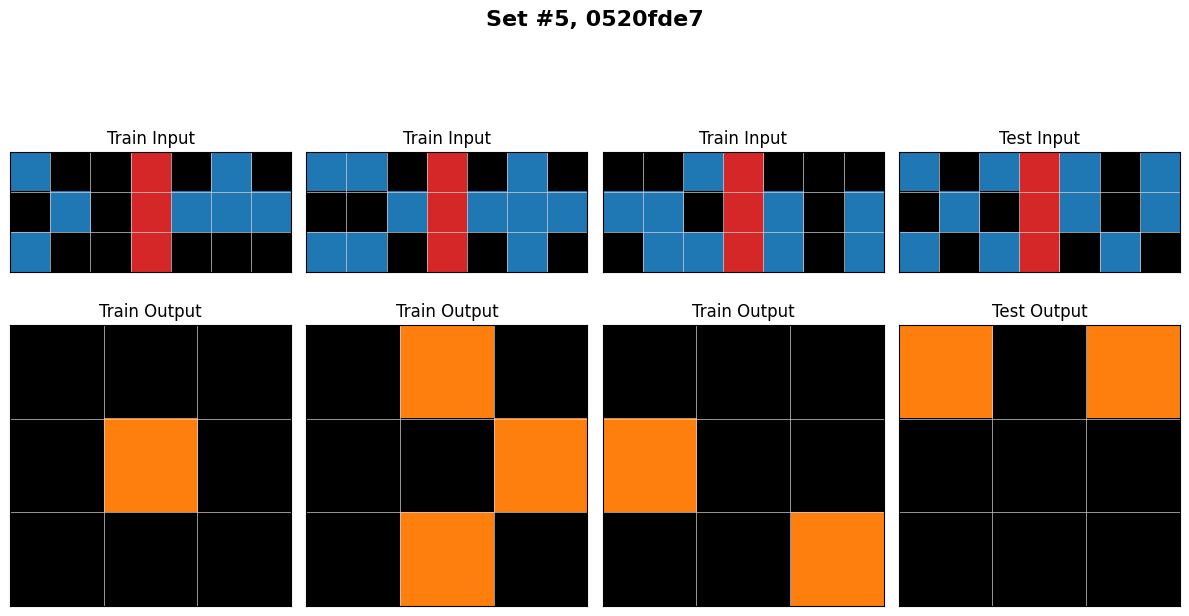

Set #5, 0520fde7


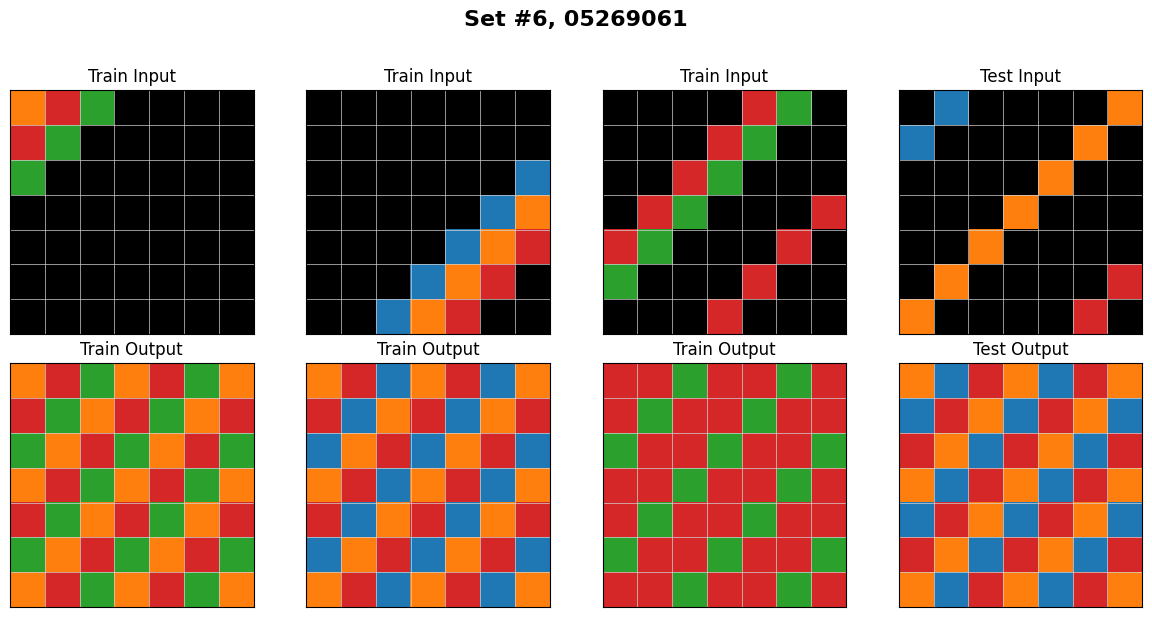

Set #6, 05269061


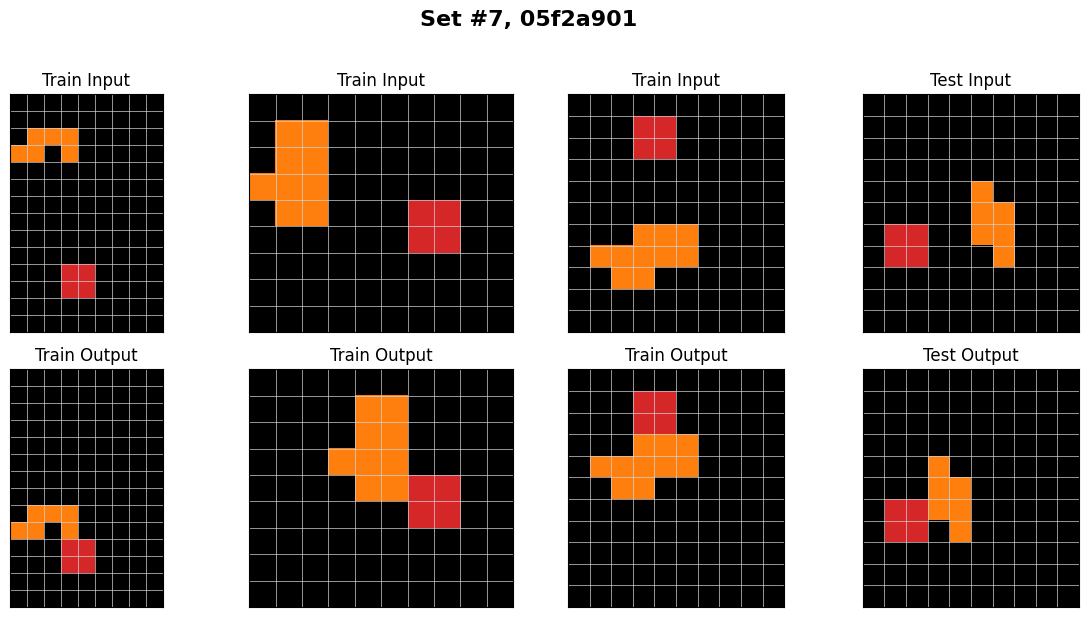

Set #7, 05f2a901


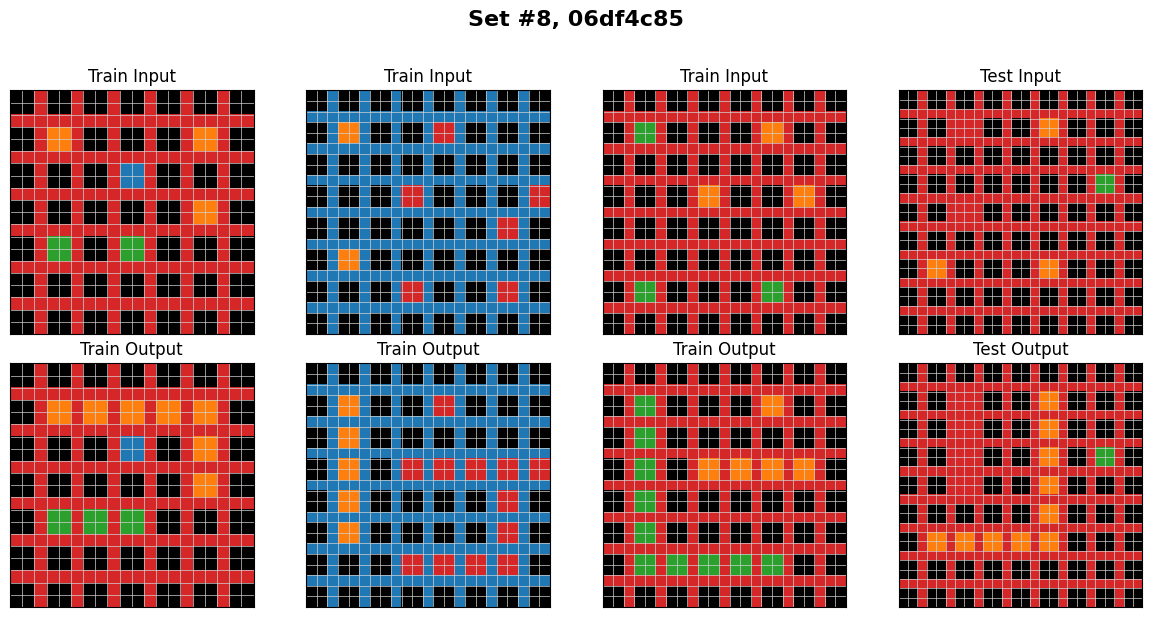

Set #8, 06df4c85


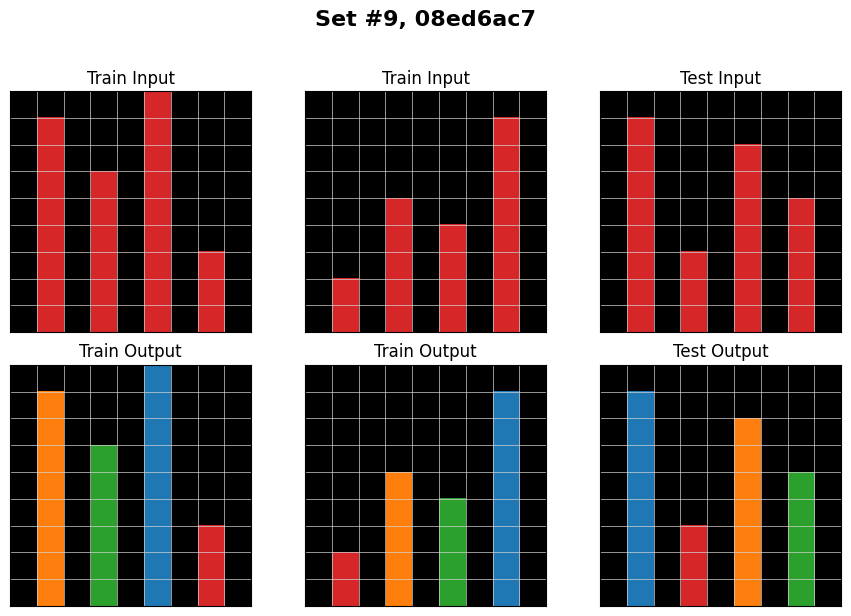

Set #9, 08ed6ac7


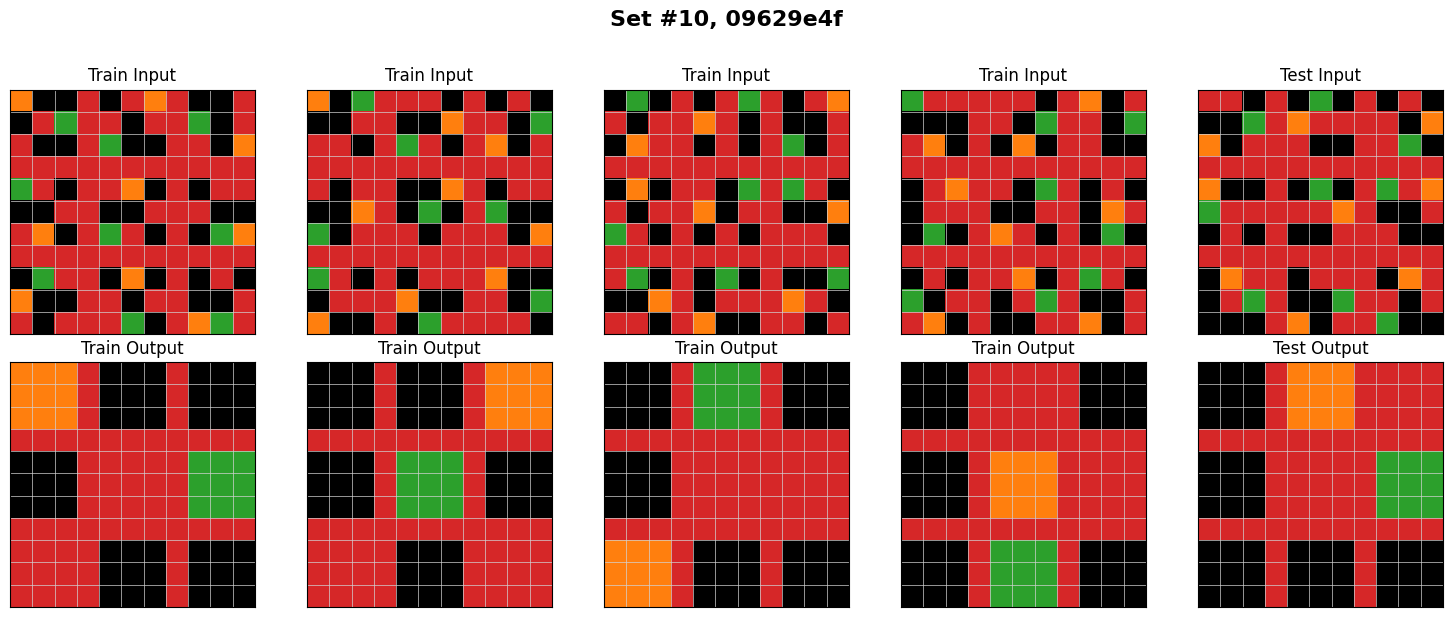

Set #10, 09629e4f


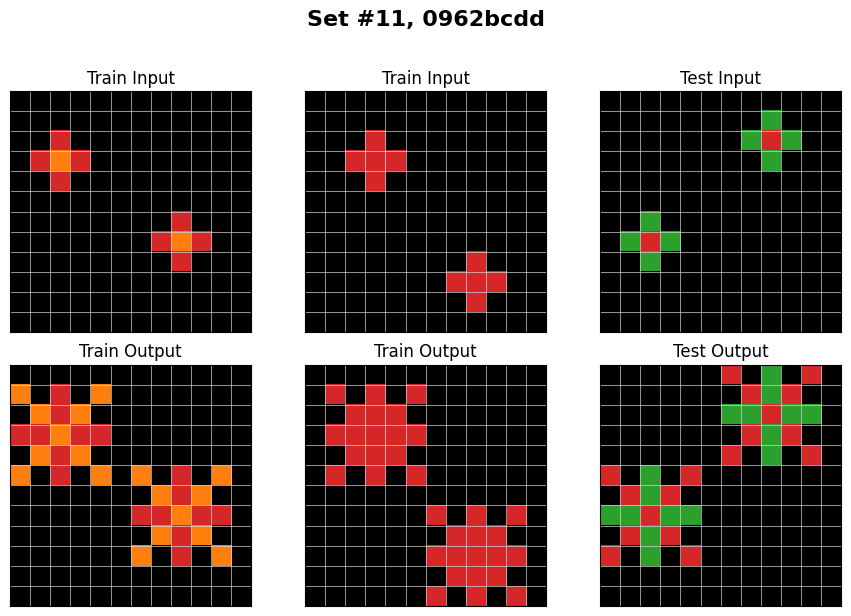

Set #11, 0962bcdd


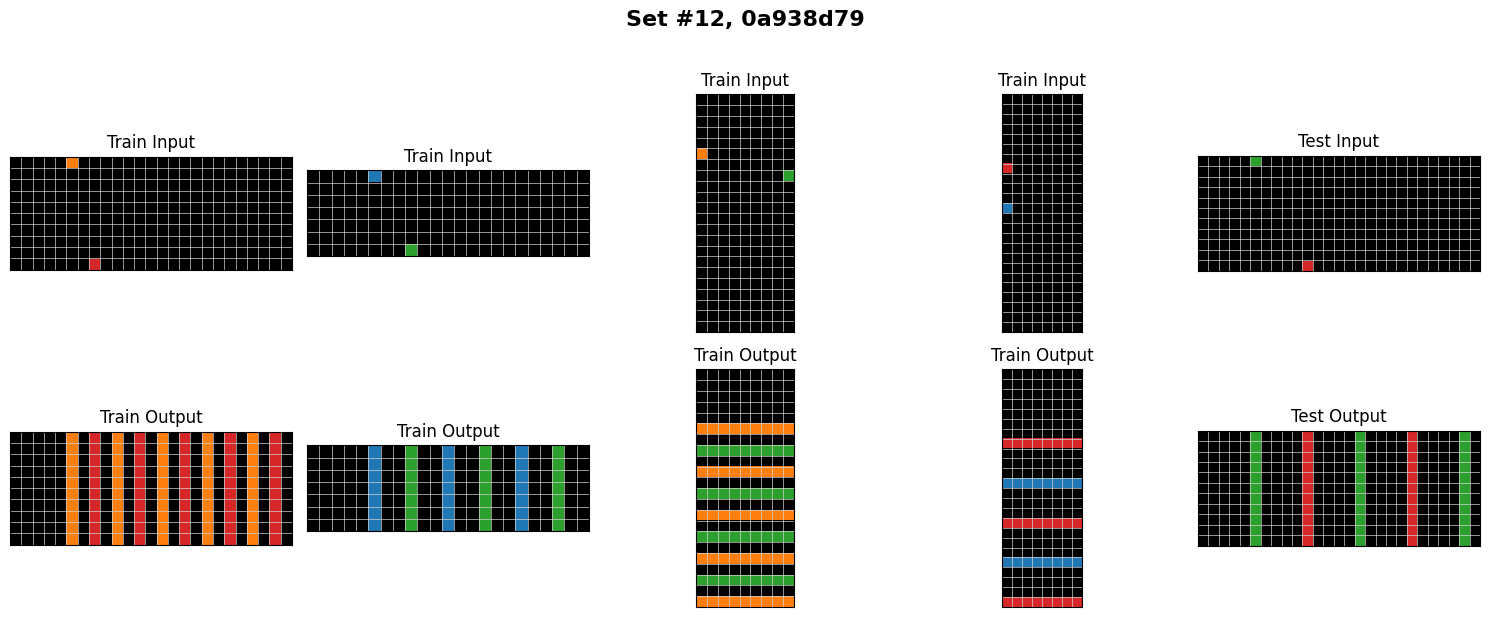

Set #12, 0a938d79


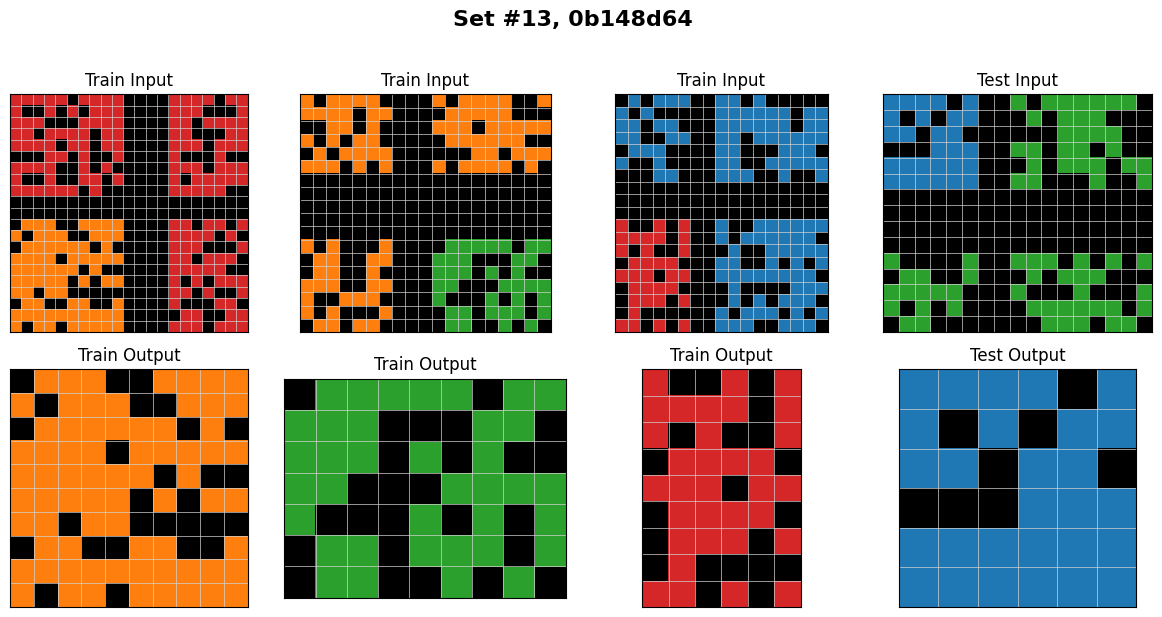

Set #13, 0b148d64


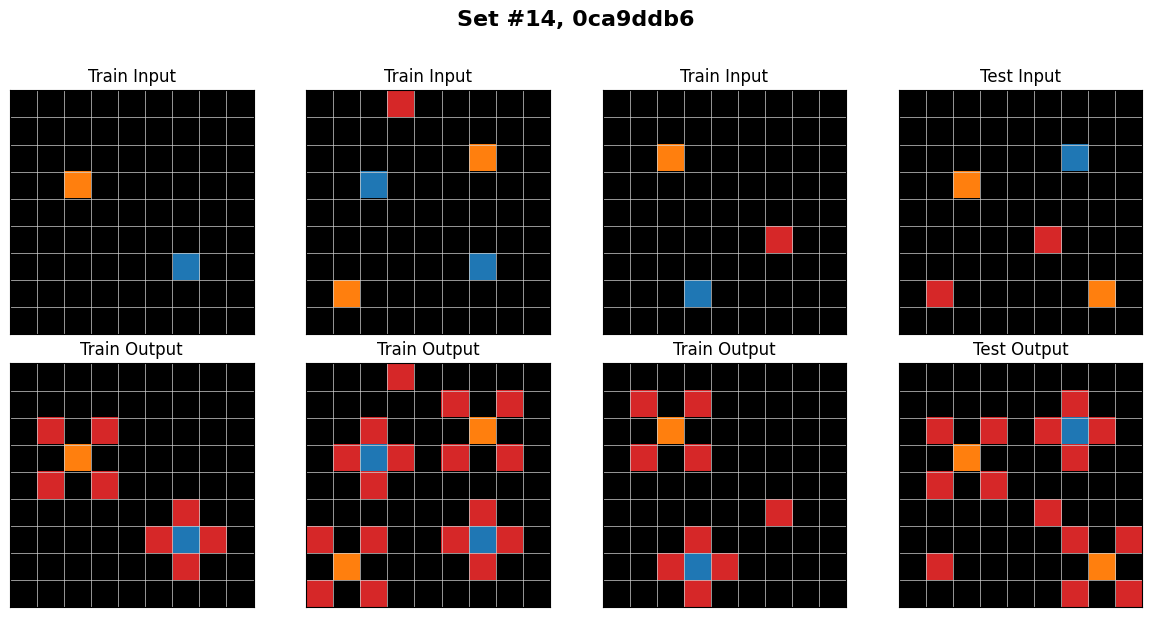

Set #14, 0ca9ddb6


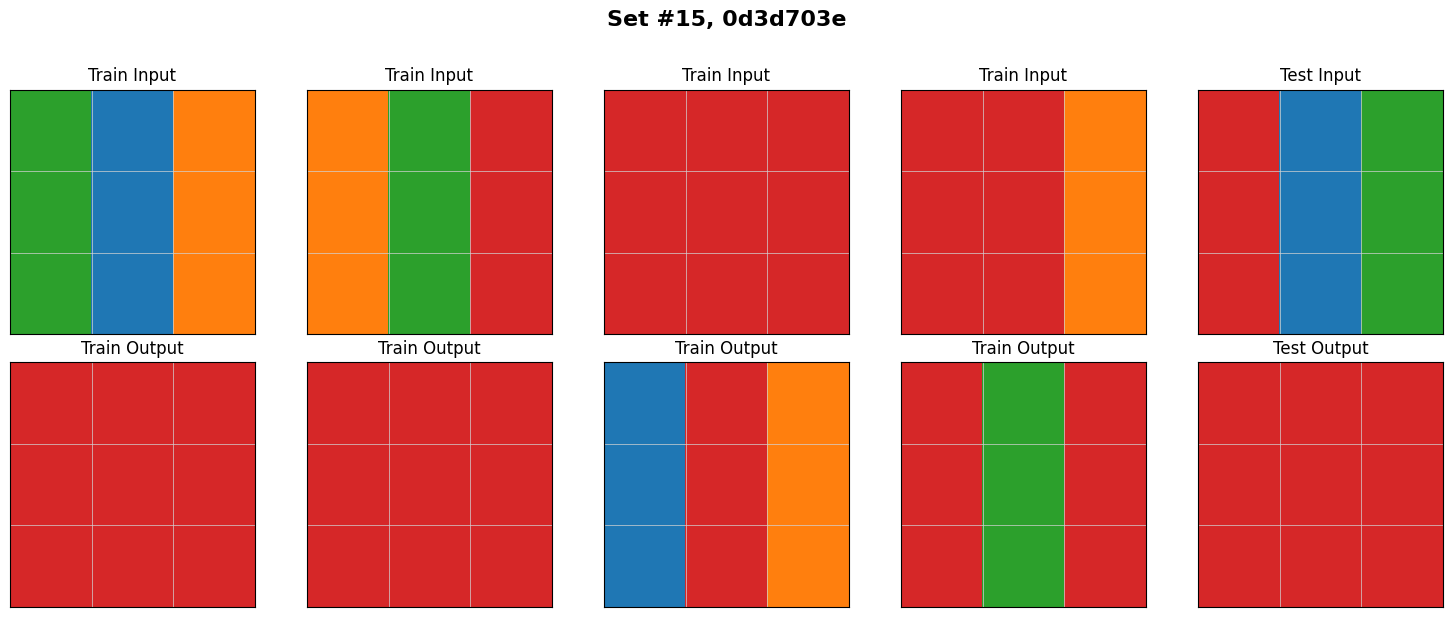

Set #15, 0d3d703e


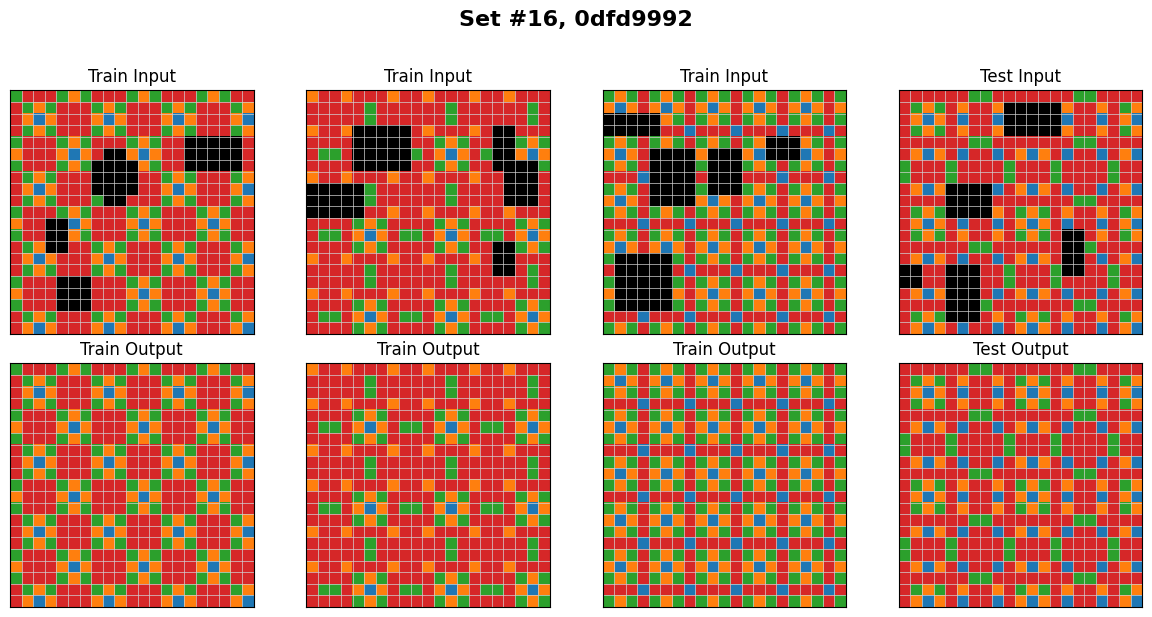

Set #16, 0dfd9992


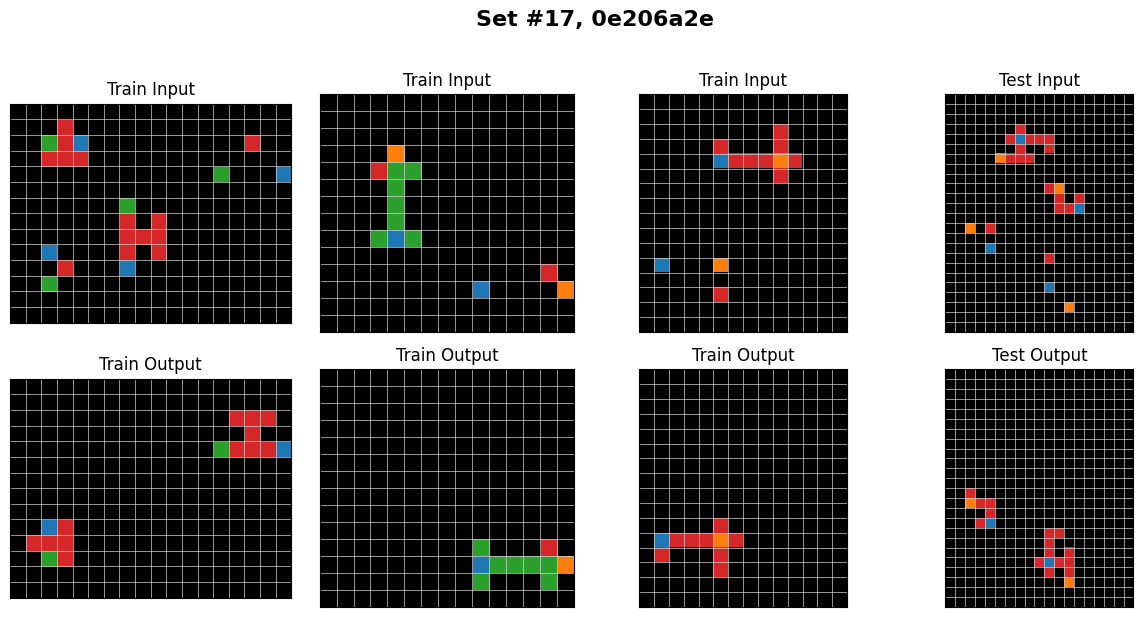

Set #17, 0e206a2e


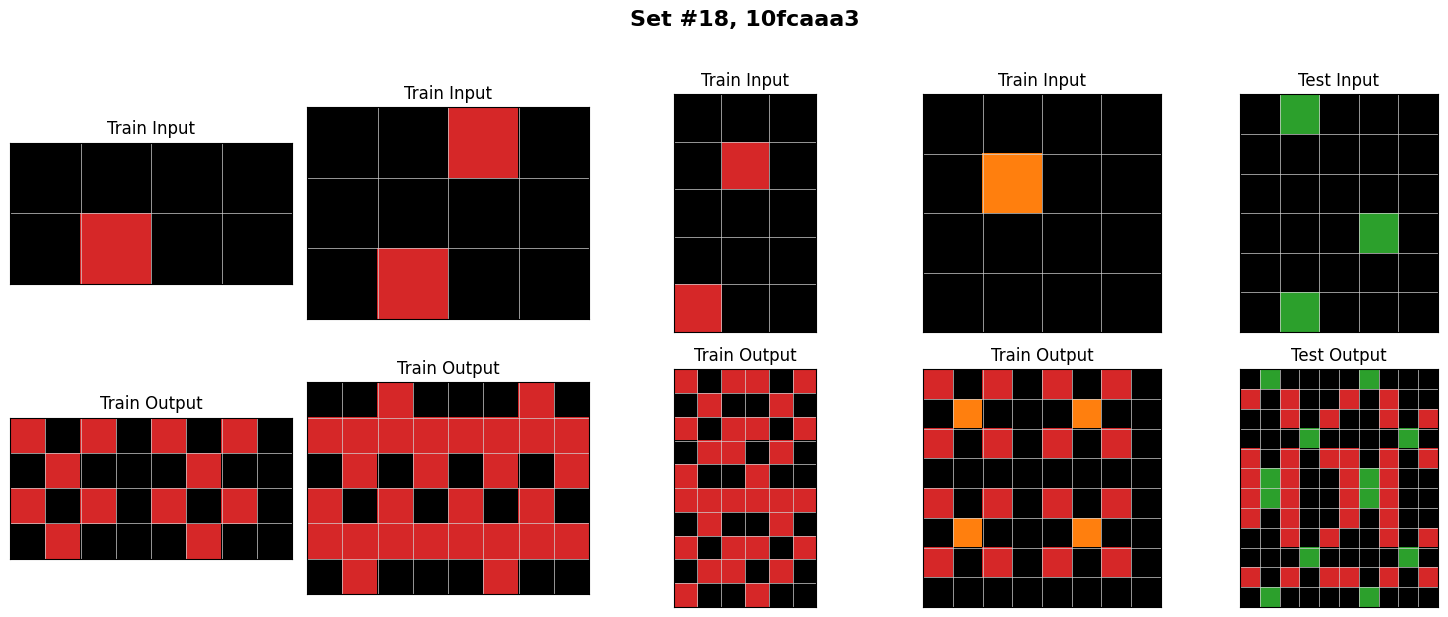

Set #18, 10fcaaa3


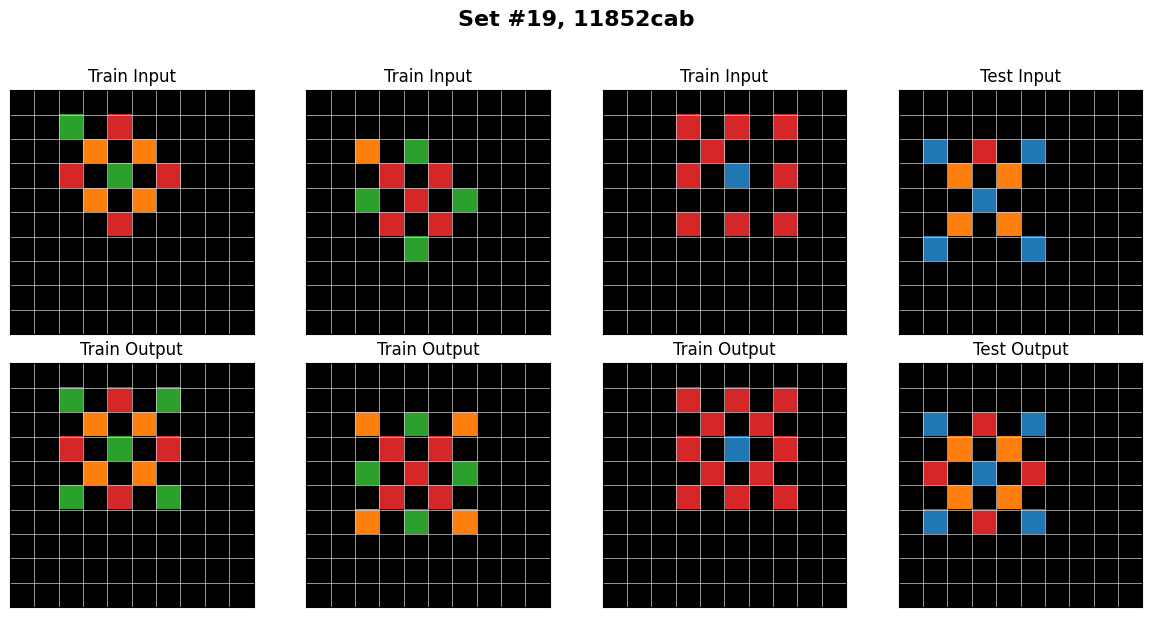

Set #19, 11852cab


In [20]:
for i in range(0, 20):
    t = list(agi_training_challenges)[i]  # Get the task name/key at index `i`.
    task = agi_training_challenges[t]  # Retrieve the task data associated with this key.
    task_solution = agi_training_solutions[t][0]  # Retrieve the first solution for this task.
    plot_task(task, task_solution, i, t)  # Use `task_solution` to plot the task

# <p style="font-family: 'Amiri'; font-size: 2rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #deadb2; padding: 10px; border-radius: 20px; border: 8px solid black; width:90%">generate Predictions</p>

In [21]:
# Function to flip 0s to 1s and vice versa
def simple_heuristic_model(input_grid):
    return [[1 if cell == 0 else 0 for cell in row] for row in input_grid]

# Function to generate predictions by inverting colors (adding 1 and wrapping around)
def generate_prediction(input_grid):
    return [[(cell + 1) % 10 for cell in row] for row in input_grid]

# Alternative prediction function: doubling cell values and wrapping around
def alternative_prediction(input_grid):
    return [[cell * 2 % 10 for cell in row] for row in input_grid]

# Example input data structure for testing
test_data = {
    "task_1": {
        "test": [
            {"input": [[0, 1], [1, 0]]},
            {"input": [[1, 2], [3, 4]]}
        ]
    },
    "task_2": {
        "test": [
            {"input": [[5, 6], [7, 8]]},
            {"input": [[9, 0], [1, 2]]}
        ]
    }
}

# Initialize an empty submission dictionary to store predictions
submission = {}

# Loop through each task and its test examples to apply the prediction functions
for task_id, task in test_data.items():
    task_predictions = []
    
    for test_example in task['test']:
        input_grid = test_example['input']
        
        # First prediction attempt using the generate_prediction function
        attempt_1 = generate_prediction(input_grid)
        
        # Second prediction attempt using the alternative_prediction function
        attempt_2 = alternative_prediction(input_grid)
        
        # Store the predictions in a dictionary for this test example
        task_predictions.append({
            "attempt_1": attempt_1,
            "attempt_2": attempt_2
        })
    
    # Save all predictions for the task in the submission dictionary
    submission[task_id] = task_predictions

# Output the predictions for review
for task_id, predictions in submission.items():
    print(f"Predictions for {task_id}:")
    for idx, prediction in enumerate(predictions):
        print(f"  Test Example {idx + 1}:")
        print(f"    Attempt 1: {prediction['attempt_1']}")
        print(f"    Attempt 2: {prediction['attempt_2']}")


Predictions for task_1:
  Test Example 1:
    Attempt 1: [[1, 2], [2, 1]]
    Attempt 2: [[0, 2], [2, 0]]
  Test Example 2:
    Attempt 1: [[2, 3], [4, 5]]
    Attempt 2: [[2, 4], [6, 8]]
Predictions for task_2:
  Test Example 1:
    Attempt 1: [[6, 7], [8, 9]]
    Attempt 2: [[0, 2], [4, 6]]
  Test Example 2:
    Attempt 1: [[0, 1], [2, 3]]
    Attempt 2: [[8, 0], [2, 4]]


#### Add runmodel functions

In [22]:
import numpy as np

def run_model(challenges):
    submission = {}
    
    for task_id, task in challenges.items():
        # Initialize predictions for the task
        task_prediction = []
        
        # Iterate through each test pair (input/output) in the task
        for test_case in task['test']:
            input_grid = np.array(test_case['input'])  # Convert list to NumPy array
            predicted_output_1 = None
            predicted_output_2 = None
            
            # First prediction attempt using common transformations
            if is_mirrorable(input_grid):
                predicted_output_1 = mirror(input_grid)
            elif is_rotatable(input_grid):
                predicted_output_1 = rotate(input_grid, 90)  # 90-degree rotation
            elif is_color_fillable(input_grid):
                predicted_output_1 = color_fill(input_grid)
            else:
                predicted_output_1 = input_grid  # Fallback prediction
            
            # Second prediction attempt with different transformations
            if is_scalable(input_grid):
                predicted_output_2 = scale_up(input_grid)
            elif is_rotatable(input_grid):
                predicted_output_2 = rotate(input_grid, 180)  # 180-degree rotation
            else:
                predicted_output_2 = input_grid  # Fallback prediction
            
            # Store the predictions for this test case
            task_prediction.append({"attempt_1": predicted_output_1.tolist(), "attempt_2": predicted_output_2.tolist()})
        
        submission[task_id] = task_prediction
    
    return submission

def rotate(grid, degrees):
    return np.rot90(grid, k=degrees//90)

def mirror(grid):
    return np.fliplr(grid)

def color_fill(grid):
    new_grid = np.copy(grid)
    new_grid[grid == 0] = 1
    return new_grid

def scale_up(grid):
    return np.kron(grid, np.ones((2, 2)))

def is_mirrorable(grid):
    return not np.array_equal(grid, np.fliplr(grid))

def is_rotatable(grid):
    return len(np.unique(grid)) > 1

def is_color_fillable(grid):
    return np.any(grid == 0)

def is_scalable(grid):
    return grid.shape[0] < 10 and grid.shape[1] < 10


In [23]:
def generate_predictions(challenges):
    return {task_id: [{"attempt_1": test_case['input'], "attempt_2": test_case['input']} for test_case in task['test']] for task_id, task in challenges.items()}


In [24]:
generate_predictions(agi_training_challenges)

{'007bbfb7': [{'attempt_1': [[7, 0, 7], [7, 0, 7], [7, 7, 0]],
   'attempt_2': [[7, 0, 7], [7, 0, 7], [7, 7, 0]]}],
 '00d62c1b': [{'attempt_1': [[0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0],
    [0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 

# <p style="font-family: 'Amiri'; font-size: 2rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #deadb2; padding: 10px; border-radius: 20px; border: 8px solid black; width:90%">Evaluate Predictions</p>

In [25]:
def score_submission(submission, solutions):
    total_score = 0
    total_tasks = 0

    # Loop through each task in the submission
    for task_id, task_submission in submission.items():
        # Check if the task exists in solutions
        if task_id not in solutions:
            print(f"Warning: Task ID {task_id} not found in solutions. Skipping this task.")
            continue  # Skip if the task is missing in solutions

        total_tasks += 1
        task_score = 0
        num_pairs = len(task_submission)

        # Loop through each pair of predictions for this task
        for pair_index, pair_attempts in enumerate(task_submission):
            # Check if the pair exists in solutions
            if pair_index >= len(solutions[task_id]):
                print(f"Warning: Pair index {pair_index} not found for Task ID {task_id}. Skipping this pair.")
                continue  # Skip if the pair is missing

            # Compare each prediction attempt with the solution
            if (pair_attempts["attempt_1"] == solutions[task_id][pair_index] or
                pair_attempts["attempt_2"] == solutions[task_id][pair_index]):
                task_score += 1  # Consider the pair solved if either attempt is correct

        # Calculate the average score for the task
        task_score /= num_pairs
        total_score += task_score

    # Calculate the final score as a percentage
    final_score = (total_score / total_tasks) * 100 if total_tasks > 0 else 0
    
    # Display the final score
    print(f"Final score: {final_score:.2f}% (Scored {total_score:.2f} out of {total_tasks})")

    return final_score

# Example of how to call the function and show the score
submission = {
    #submission data
}

solutions = {
   #solution data
}
# Load your training data
training_challenges = {
    # Your training challenges data
}

training_solutions = {
    #training solutions data
}
evaluation_challenges = {
    #evaluation solution data
}
evaluation_challenges = {
    #evaluation challenges data
}

# Run your model to generate predictions
submission = run_model(agi_training_challenges)

# Score the predictions against training_solutions
score = score_submission(submission=submission, solutions=agi_training_solutions)

# Run your model to generate predictions
submission = run_model(agi_evaluation_challenges)

# Score the predictions against training_solutions
score = score_submission(submission=submission, solutions=agi_evaluation_solutions)

# Display the final score
print(f"Final training score: {score:.2f}%")

Final score: 0.50% (Scored 2.00 out of 400)
Final score: 0.25% (Scored 1.00 out of 400)
Final training score: 0.25%


# <p style="font-family: 'Amiri'; font-size: 2rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #deadb2; padding: 10px; border-radius: 20px; border: 8px solid black; width:90%">Submission to Json File</p>

In [26]:
def save_submission(submission, file_name='submission.json'):
    with open(file_name, 'w') as f:
        json.dump(submission, f, indent=4)
    print(f'Submission saved to {file_name}')
submission = run_model(agi_evaluation_challenges)
save_submission(submission, file_name='submission.json')

Submission saved to submission.json
